In [1]:
#Compare Algorithms
#from sklearnex import patch_sklearn
#patch_sklearn()

import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# fix random seed for reproducibility
import itertools
from sklearn.model_selection import KFold
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")
numpy.random.seed(7)

In [2]:
df_Meander = pd.read_csv('C:/Users/Liaqat Ali/Documents/ChiGaNet/NewMeander.csv')
df_spiral = pd.read_csv('C:/Users/Liaqat Ali/Documents/ChiGaNet/NewSpiral.csv')

In [3]:
print(df_spiral.columns)
print(df_Meander.columns)
print(df_spiral.shape)
print(df_Meander.shape)

Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
(264, 16)
(264, 16)


In [4]:
Y_df_S = df_spiral.iloc[:,3]
Y_df_M = df_Meander.iloc[:,3]
print(Y_df_S)
Y_df_S = Y_df_S.replace(1, 0)    #We need to replace the 1 value by 0 as there are two values 1 (healthy), 2(patient)
Y_df_M = Y_df_M.replace(1, 0)

Y_df_S = Y_df_S.replace(2, 1)   #We need to replace the 2 value by 1
Y_df_M = Y_df_M.replace(2, 1)
print(Y_df_S)
print(Y_df_M)

0      1
1      1
2      1
3      1
4      1
      ..
259    2
260    2
261    2
262    2
263    2
Name: CLASS_TYPE, Length: 264, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
259    1
260    1
261    1
262    1
263    1
Name: CLASS_TYPE, Length: 264, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
259    1
260    1
261    1
262    1
263    1
Name: CLASS_TYPE, Length: 264, dtype: int64


In [5]:
#df_spiral = df_spiral.drop('_ID_EXAM', 1) 
X_df_S = df_spiral.iloc[:, 7:16]
X_df_M = df_Meander.iloc[:, 7:16]
print(X_df_S.columns)
print(X_df_M.columns)
print(X_df_S.shape)
print(X_df_M.shape)
print(Y_df_S.shape)
print(Y_df_M.shape)

Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
(264, 9)
(264, 9)
(264,)
(264,)


In [6]:
X_S = numpy.array(X_df_S)
X_M = numpy.array(X_df_M)
Y_S = numpy.array(Y_df_S)
Y_M = numpy.array(Y_df_M)

print(X_S.shape)
print(X_M.shape)
print(Y_S.shape)
print(Y_M.shape)
print(Y_S)

(264, 9)
(264, 9)
(264,)
(264,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


# ChiGa-Net Spiral Drawings 

In [7]:
global opt_rslt_nn
global opt_alpha 
global opt_n1 
global opt_n2 
global opt_k_nn

opt_rslt_nn = 0
opt_alpha = 0
opt_n1 = 0
opt_n2 = 0
opt_k_nn = 0

def mig_net(x_tr, y_tr, k):
	# create model
  global opt_rslt_nn
  global opt_alpha 
  global opt_n1 
  global opt_n2 
  global opt_k_nn
    
  clf = MLPClassifier( random_state=42)
  x = range(1,31)
  #param_grid= {'gamma': Continuous(0.0001, 1000, distribution='log-uniform'),'C': Continuous(0.0001, 1000, distribution='log-uniform')}
  param_grid = {
        "hidden_layer_sizes": Categorical(list(itertools.combinations(x, 2))),
        "alpha": Categorical([1e-5, 1e-4, 1e-3, 1e-2, 1e-1]),
        "solver": Categorical(['lbfgs'])
    }
  cv = KFold(n_splits=66)

  evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=30,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=False,
                               keep_top_k=4)
    
    
  evolved_estimator.fit(x_tr, y_tr)  # Make sure x_tr and y_tr passed to the function are already balanced
  if evolved_estimator.best_score_ >= opt_rslt_nn:
    opt_rslt_nn = evolved_estimator.best_score_
    best_params = evolved_estimator.best_params_
    opt_n1, opt_n2 = best_params['hidden_layer_sizes']
    opt_alpha = best_params['alpha']
    #opt_gamma = opt_para[0][0] #Optimal HP is recorded, we can use it later in next stage to evaluate testing results
    #opt_c_rbf = opt_para[0][1]     #Optimal HP is recorded, we can use it later in next stage to evaluate testing results
    print(opt_n1, opt_n2)
    print(opt_alpha)
    opt_k_nn = k  #Optimal Subset of Features is recorded, we can use it later in next stage to evaluate testing results
  return evolved_estimator.best_params_

In [8]:
opt_hyp = []
K = range(1, 10)
for k in K:
    model_FS = SelectKBest(chi2, k=k)
    model_FS.fit(X_S, Y_S)
    X_S_FS = model_FS.transform(X_S)
    #X_Test_bal_new = model_FS.transform(X_Testing_features_flatten_all)
    S1=model_FS.get_support()
    print(S1)
    
    
    hyp = mig_net(X_S_FS, Y_S, k)
    opt_hyp.append(hyp)
    #print("Values in the opt_hyp list are = ", opt_hyp)


[ True False False False False False False False False]
7 17
0.001
[ True False False False False False False  True False]
[ True  True False False False False False  True False]
14 23
0.01
[ True  True False False  True False False  True False]
[ True  True False  True  True False False  True False]
[ True  True  True  True  True False False  True False]
[ True  True  True  True  True False  True  True False]
[ True  True  True  True  True  True  True  True False]
[ True  True  True  True  True  True  True  True  True]


In [9]:
print('Done')

Done


In [10]:
print(opt_n1, opt_n2)
print(opt_alpha)
print(opt_k_nn)

14 23
0.01
3


In [11]:
#K_list = range(1, 10)
#for K in K_list:
model_FS = SelectKBest(chi2, k=opt_k_nn)
model_FS.fit(X_S,Y_S)
X_FS = model_FS.transform(X_S)
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
    
    
Best_Acc=0
TP=0
TN=0
FP=0
FN=0
j=1
lb=0
ub=4
cor_class=0
Net_folds_Acc = 0
while j<=66:

    Y_test = Y_S[range(lb,ub)]
    Y_train = numpy.delete(Y_S, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)


    model =  MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)
   

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)
    Net_folds_Acc = Net_folds_Acc+scores
    #Below condition for negative class
    if Y_test.sum()==0:
        if scores>=0.5:
            cor_class = cor_class+1
            TN=TN+1
    #Below condition for postiive class
    if Y_test.sum() != 0:
        if scores>0.5:
            cor_class = cor_class+1
            TP=TP+1
    
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Sub_Acc = (cor_class*100)/66
FN = 31-TP
FP = 35-TN
if (LOSO_Sub_Acc>=Best_Acc):
    Best_Acc = LOSO_Sub_Acc
    print("Best Sub Acc ================", Best_Acc)
    print("Avg folds or samples Acc =", Net_folds_Acc/66)
    print("Sen =", (TP/31)*100)
    print("Spec =", (TN/35)*100)
    print("Alpha =", opt_alpha, "N1 =", opt_n1, "N2 =", opt_n2)
    print("Features Size =", X_FS.shape)
    

[ True  True False False False False False  True False]
Size of Selected Features = (264, 3)
Best Sub Acc ================ 100.0
Avg folds or samples Acc = 1.0
Sen = 100.0
Spec = 100.0
Alpha = 0.01 N1 = 14 N2 = 23
Features Size = (264, 3)


In [12]:
print("Done")

Done


# External Validation Spirals

In [13]:
df_Meander_hout = pd.read_csv('C:/Users/Liaqat Ali/Documents/ChiGaNet/Meander_HandPD.csv')
df_spiral_hout = pd.read_csv('C:/Users/Liaqat Ali/Documents/ChiGaNet/Spiral_HandPD.csv')

In [14]:
Y_df_S_hout = df_spiral_hout.iloc[:,3]
Y_df_M_hout = df_Meander_hout.iloc[:,3]
print(Y_df_S_hout)
Y_df_S_hout = Y_df_S_hout.replace(1, 0)
Y_df_M_hout = Y_df_M_hout.replace(1, 0)

Y_df_S_hout = Y_df_S_hout.replace(2, 1)
Y_df_M_hout = Y_df_M_hout.replace(2, 1)
print(Y_df_S_hout)

0      1
1      1
2      1
3      1
4      1
      ..
363    2
364    2
365    2
366    2
367    2
Name: CLASS_TYPE, Length: 368, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
363    1
364    1
365    1
366    1
367    1
Name: CLASS_TYPE, Length: 368, dtype: int64


In [15]:
#df_spiral = df_spiral.drop('_ID_EXAM', 1) 
X_df_S_hout = df_spiral_hout.iloc[:, 7:16]
X_df_M_hout = df_Meander_hout.iloc[:, 7:16]
print(X_df_S_hout.columns)
print(X_df_M_hout.columns)
print(X_df_S_hout.shape)
print(X_df_M_hout.shape)
print(Y_df_S_hout.shape)
print(Y_df_M_hout.shape)

Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['RMS', 'MAX_BETWEEN_ST_HT', 'MIN_BETWEEN_ST_HT', 'STD_DEVIATION_ST_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT'],
      dtype='object')
(368, 9)
(368, 9)
(368,)
(368,)


In [16]:
X_S_hout = numpy.array(X_df_S_hout)
X_M_hout = numpy.array(X_df_M_hout)
Y_S_hout = numpy.array(Y_df_S_hout)
Y_M_hout = numpy.array(Y_df_M_hout)

print(X_S_hout.shape)
print(X_M_hout.shape)
print(Y_S_hout.shape)
print(Y_M_hout.shape)
print(Y_M)
print(Y_M_hout)

(368, 9)
(368, 9)
(368,)
(368,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [17]:
#K_list = range(1, 10)
#for K in K_list:
model_FS = SelectKBest(chi2, k=opt_k_nn)
model_FS.fit(X_S,Y_S) #Fit the FS using the main dataset
X_FS_S = model_FS.transform(X_S) #Use the fitted model to select opt FSs in in the main data, bcoz will use it to train the mdel
X_FS_S_hout = model_FS.transform(X_S_hout) #Use the fitted model to select the same FSs in holdout data as well
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS_S_hout.shape)



Sen=0
Spec=0
TP=0
TN=0
cor_class=0    
Best_Acc=0
j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S_hout[range(lb,ub)]              #For testing, subject selection from holdout data
                                                 #For training, use whole main dataset

    X_test = X_FS_S_hout[range(lb,ub)]           #For testing, subject selection from holdout data
                                                 #For training, use whole main dataset


    #model =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(node1, node2, ), random_state=1)
    model= MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)




    model.fit(X_FS_S, Y_S)   #Considing selected features and labels of HandPD dataset
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    #Below condition for negative class
    if Y_test.sum()==0:
        if scores>=0.5:
            cor_class = cor_class+1
            TN = TN+1
    #Below condition for postiive class
    if Y_test.sum() != 0:
        if scores>0.5:
            cor_class = cor_class+1
            TP = TP+1
    
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Sub_Acc = (cor_class*100)/92

Sen = (TP/74)*100
Spec = (TN/18)*100
Best_Acc = LOSO_Sub_Acc
print("LOSO Ubjects Acc ================", LOSO_Sub_Acc)
print("Bal Acc ================", (Sen+Spec)/2)
print("Sen =", Sen)
print("Spec =", Spec)
print("Features Size =", X_FS_S.shape)
    

[ True  True False False False False False  True False]
Size of Selected Features = (368, 3)
LOSO Ubjects Acc ================ 19.565217391304348
Bal Acc ================ 50.0
Sen = 0.0
Spec = 100.0
Features Size = (264, 3)


In [18]:
model_FS = SelectKBest(chi2, k=opt_k_nn)
model_FS.fit(X_S,Y_S) #Fit the FS using the main dataset
X_FS_S = model_FS.transform(X_S) #Use the fitted model to select opt FSs in in the main data, bcoz will use it to train the mdel
X_FS_S_hout = model_FS.transform(X_S_hout) #Use the fitted model to select the same FSs in holdout data as well
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS_S_hout.shape)

[ True  True False False False False False  True False]
Size of Selected Features = (368, 3)


# Subjectwise Confusion Matrix Spirals Data

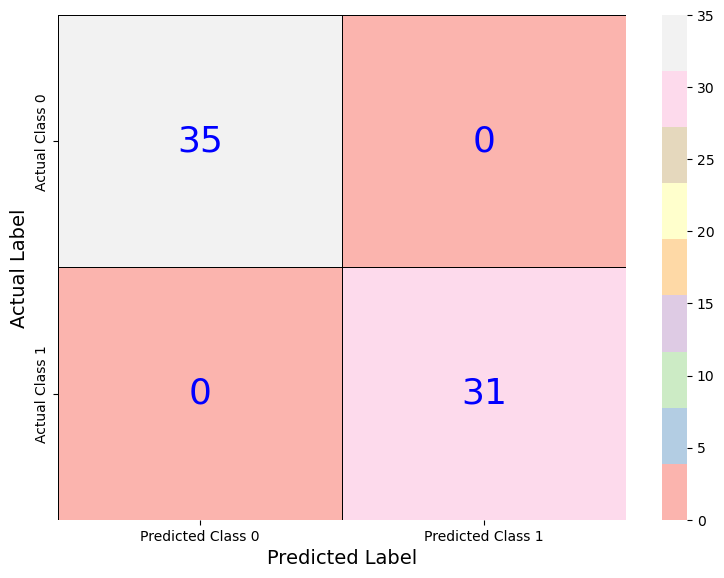

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

# Assuming X_FS_M is the data and Y_M are the labels for 66 subjects, each with 4 samples per subject
subjects = 66  # Number of subjects
samples_per_subject = 4  # Number of samples per subject

# Initialize lists to store true and predicted labels for each subject
Y_true_subjects = []
Y_pred_subjects = []

# Loop over each subject (LOSO Cross-Validation)
for i in range(subjects):
    # Get the indices for the test subject (the ith subject)
    test_indices = list(range(i * samples_per_subject, (i + 1) * samples_per_subject))
    
    # Get the training indices (all other subjects except the ith subject)
    train_indices = list(set(range(subjects * samples_per_subject)) - set(test_indices))
    
    # Split the data into training and testing sets
    X_train, X_test = X_FS_S[train_indices], X_FS_S[test_indices]
    Y_train, Y_test = Y_S[train_indices], Y_S[test_indices]
    
    # Train the model on the training set
    model = MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)
    model.fit(X_train, Y_train)
    
    # Predict the labels for the test set (left-out subject)
    Y_test_pred = model.predict(X_test)
    
    # Aggregate the test labels for the subject-level prediction
    true_label = np.bincount(Y_test).argmax()  # Majority class for subject (true labels)
    correct_classifications = np.sum(Y_test == Y_test_pred)  # Count correct predictions
    
    # Apply different rules based on the true class
    if true_label == 0:
        # For class 0: Correct if half or more of the samples are correctly classified
        if correct_classifications >= samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    else:
        # For class 1: Correct if more than half of the samples are correctly classified
        if correct_classifications > samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    
    # Store the true and predicted labels for this subject
    Y_true_subjects.append(true_label)
    Y_pred_subjects.append(predicted_label)

# Step 2: Generate the confusion matrix for subjects based on the aggregated predictions
cm = confusion_matrix(Y_true_subjects, Y_pred_subjects)

# Step 3: Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))

# Customize the colormap: You can choose any of the following
# cmap = 'Blues', 'Greens', 'Reds', 'coolwarm', 'inferno', 'plasma', 'magma', 'viridis', 'cividis'
sns.heatmap(cm, annot=True, fmt='g', cmap='Pastel1', cbar=True, 
            xticklabels=['Predicted Class 0', 'Predicted Class 1'], 
            yticklabels=['Actual Class 0', 'Actual Class 1'], 
            linewidths=0.5, linecolor='black', annot_kws={"size": 26, "color": "blue"})

# Customize labels and title
#plt.title('Confusion Matrix (LOSO CV: Main Dataset Meanders)', fontsize=16)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Show the plot
plt.tight_layout(pad=1.5)  # Adjusts the plot to ensure everything fits without overlap
# Save the figure as .eps file with proper bounding box
plt.savefig('cm_maindata_spirals.eps', format='eps', dpi=300, bbox_inches='tight')  # Save with tight bounding box

# Save the figure as .jpg file
plt.savefig('cm_maindata_spirals.jpg', format='jpg', dpi=300, bbox_inches='tight')  # Save as JPG
# Show the plot (optional, since we're saving the file)
plt.show()


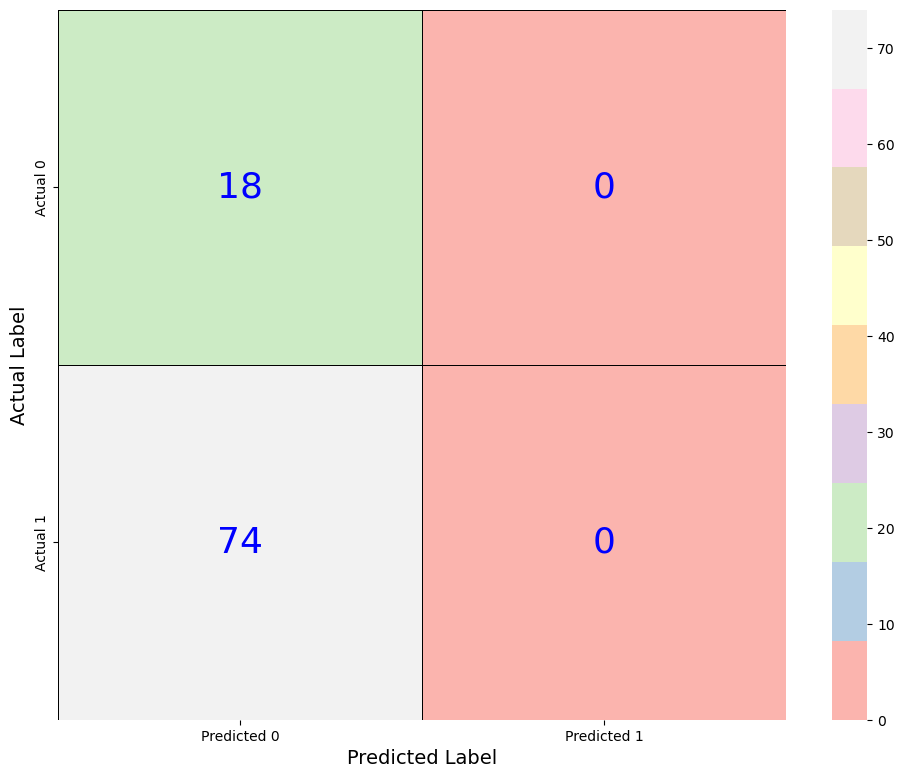

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

# Train the model
model = MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)
model.fit(X_FS_S, Y_S)

# Make predictions on the test set for all samples
Y_df_S_hout_pred_samples = model.predict(X_FS_S_hout)

# Assuming `Y_df_M_hout` and `Y_df_M_hout_pred_samples` contain the true and predicted labels for each sample, 
# and that each subject has 4 samples.
subjects = len(Y_df_S_hout) // 4  # Assuming each subject has 4 samples
samples_per_subject = 4

# Step 1: Aggregate predictions for each subject
Y_true_subjects = []  # Ground truth for each subject
Y_pred_subjects = []  # Aggregated prediction for each subject

for i in range(subjects):
    # Get the true labels and predicted labels for the current subject's samples
    true_labels = Y_df_S_hout[i * samples_per_subject:(i + 1) * samples_per_subject]
    pred_labels = Y_df_S_hout_pred_samples[i * samples_per_subject:(i + 1) * samples_per_subject]
    
    # Get the majority true label for the subject
    true_label = np.bincount(true_labels).argmax()  # Majority class for subject (true labels)
    Y_true_subjects.append(true_label)
    
    # Count the number of correct predictions for this subject
    correct_classifications = np.sum(true_labels == pred_labels)
    
    # Apply different rules based on the true class
    if true_label == 0:
        # For class 0: Correct if half or more of the samples are correctly classified
        if correct_classifications >= samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    else:
        # For class 1: Correct if more than half of the samples are correctly classified
        if correct_classifications > samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    
    Y_pred_subjects.append(predicted_label)

# Step 2: Generate the confusion matrix for subjects
cm = confusion_matrix(Y_true_subjects, Y_pred_subjects)

# Step 3: Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))

# Customize the colormap: You can choose any of the following
# cmap = 'Blues', 'Greens', 'Reds', 'coolwarm', 'inferno', 'plasma', 'magma', 'viridis', 'cividis'
sns.heatmap(cm, annot=True, fmt='g', cmap='Pastel1', cbar=True, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], 
            linewidths=0.5, linecolor='black', annot_kws={"size": 26, "color": "blue"})

# Customize labels and title
#plt.title('Confusion Matrix for New Dataset Meanders', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Show the plot
plt.tight_layout(pad=1.5)  # Adjusts the plot to ensure everything fits without overlap
# Save the figure as .eps file with proper bounding box
plt.savefig('cm_houtdata_spirals.eps', format='eps', dpi=300, bbox_inches='tight')  # Save with tight bounding box

# Save the figure as .jpg file
plt.savefig('cm_houtdata_spirals.jpg', format='jpg', dpi=300, bbox_inches='tight')  # Save as JPG
# Show the plot (optional, since we're saving the file)
plt.show()

# MIGNET for Meanders

In [21]:
global opt_rslt_nn
global opt_alpha 
global opt_n1 
global opt_n2 
global opt_k_nn

opt_rslt_nn = 0
opt_alpha = 0
opt_n1 = 0
opt_n2 = 0
opt_k_nn = 0

def mig_net(x_tr, y_tr, k):
	# create model
  global opt_rslt_nn
  global opt_alpha 
  global opt_n1 
  global opt_n2 
  global opt_k_nn
    
  clf = MLPClassifier( random_state=42)
  x = range(1,31)
  #param_grid= {'gamma': Continuous(0.0001, 1000, distribution='log-uniform'),'C': Continuous(0.0001, 1000, distribution='log-uniform')}
  param_grid = {
        "hidden_layer_sizes": Categorical(list(itertools.combinations(x, 2))),
        "alpha": Categorical([1e-5, 1e-4, 1e-3, 1e-2, 1e-1]),
        "solver": Categorical(['lbfgs'])
    }
  cv = KFold(n_splits=66)

  evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=30,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=False,
                               keep_top_k=4)
    
    
  evolved_estimator.fit(x_tr, y_tr)  # Make sure x_tr and y_tr passed to the function are already balanced
  if evolved_estimator.best_score_ >= opt_rslt_nn:
    opt_rslt_nn = evolved_estimator.best_score_
    best_params = evolved_estimator.best_params_
    opt_n1, opt_n2 = best_params['hidden_layer_sizes']
    opt_alpha = best_params['alpha']
    #opt_gamma = opt_para[0][0] #Optimal HP is recorded, we can use it later in next stage to evaluate testing results
    #opt_c_rbf = opt_para[0][1]     #Optimal HP is recorded, we can use it later in next stage to evaluate testing results
    print(opt_n1, opt_n2)
    print(opt_alpha)
    opt_k_nn = k  #Optimal Subset of Features is recorded, we can use it later in next stage to evaluate testing results
  return evolved_estimator.best_params_

In [22]:
opt_hyp = []
K = range(1, 10)
for k in K:
    model_FS = SelectKBest(chi2, k=k)
    model_FS.fit(X_M, Y_M)
    X_M_FS = model_FS.transform(X_M)
    #X_Test_bal_new = model_FS.transform(X_Testing_features_flatten_all)
    S1=model_FS.get_support()
    print(S1)
    
    hyp = mig_net(X_M_FS, Y_M, k)
    opt_hyp.append(hyp)
    #print("Values in the opt_hyp list are = ", opt_hyp)


[False False False False False False False  True False]
8 18
0.01
[False False  True False False False False  True False]
[ True False  True False False False False  True False]
[ True  True  True False False False False  True False]
[ True  True  True False  True False False  True False]
[ True  True  True False  True False  True  True False]
[ True  True  True False  True  True  True  True False]
[ True  True  True  True  True  True  True  True False]
[ True  True  True  True  True  True  True  True  True]


In [23]:
#K_list = range(1, 10)
#for K in K_list:
model_FS = SelectKBest(chi2, k=opt_k_nn)
model_FS.fit(X_M,Y_M)
X_FS_M = model_FS.transform(X_M)
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS_M.shape)
    
    
Best_Acc=0
TP=0
TN=0
FP=0
FN=0
j=1
lb=0
ub=4
cor_class=0
Net_folds_Acc = 0
while j<=66:

    Y_test = Y_M[range(lb,ub)]
    Y_train = numpy.delete(Y_M, range(lb,ub), 0)

    X_test = X_FS_M[range(lb,ub)]
    X_train = numpy.delete(X_FS_M, range(lb,ub), 0)


    model =  MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)
   

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)
    Net_folds_Acc = Net_folds_Acc+scores
    #Below condition for negative class
    if Y_test.sum()==0:
        if scores>=0.5:
            cor_class = cor_class+1
            TN=TN+1
    #Below condition for postiive class
    if Y_test.sum() != 0:
        if scores>0.5:
            cor_class = cor_class+1
            TP=TP+1
    
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Sub_Acc = (cor_class*100)/66
FN = 31-TP
FP = 35-TN
if (LOSO_Sub_Acc>=Best_Acc):
    Best_Acc = LOSO_Sub_Acc
    print("Best Sub Acc ================", Best_Acc)
    print("Sen =", (TP/31)*100)
    print("Spec =", (TN/35)*100)
    print("Avg folds or samples Acc =", Net_folds_Acc/66)
    print("Alpha =", opt_alpha, "N1 =", opt_n1, "N2 =", opt_n2)
    print("Features Size =", X_FS_M.shape)
    

[False False False False False False False  True False]
Size of Selected Features = (264, 1)
Best Sub Acc ================ 84.84848484848484
Sen = 67.74193548387096
Spec = 100.0
Avg folds or samples Acc = 0.8295454545454546
Alpha = 0.01 N1 = 8 N2 = 18
Features Size = (264, 1)


# External Validation Meanders

In [24]:
#K_list = range(1, 10)
#for K in K_list:
model_FS = SelectKBest(chi2, k=opt_k_nn)
model_FS.fit(X_M,Y_M) #Fit the FS using the main dataset
X_FS_M = model_FS.transform(X_M) #Use the fitted model to select opt FSs in in the main data, bcoz will use it to train the mdel
X_FS_M_hout = model_FS.transform(X_S_hout) #Use the fitted model to select the same FSs in holdout data as well
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS_M_hout.shape)



Sen=0
Spec=0
TP=0
TN=0
cor_class=0    
Best_Acc=0
j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_M_hout[range(lb,ub)]              #For testing, subject selection from holdout data
                                                 #For training, use whole main dataset

    X_test = X_FS_M_hout[range(lb,ub)]           #For testing, subject selection from holdout data
                                                 #For training, use whole main dataset


    #model =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(node1, node2, ), random_state=1)
    model= MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)




    model.fit(X_FS_M, Y_M)   #Considing selected features and labels of HandPD dataset
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    #Below condition for negative class
    if Y_test.sum()==0:
        if scores>=0.5:
            cor_class = cor_class+1
            TN = TN+1
    #Below condition for postiive class
    if Y_test.sum() != 0:
        if scores>0.5:
            cor_class = cor_class+1
            TP = TP+1
    
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Sub_Acc = (cor_class*100)/92

Sen = (TP/74)*100
Spec = (TN/18)*100
print("LOSO Ubjects Acc ================", LOSO_Sub_Acc)
print("Bal Acc ================", (Sen+Spec)/2)
print("Sen =", Sen)
print("Spec =", Spec)
print("Features Size =", X_FS_M.shape)
    

[False False False False False False False  True False]
Size of Selected Features = (368, 1)
LOSO Ubjects Acc ================ 19.565217391304348
Bal Acc ================ 50.0
Sen = 0.0
Spec = 100.0
Features Size = (264, 1)


In [25]:
print("Alpha =", opt_alpha, "N1 =", opt_n1, "N2 =", opt_n2)

Alpha = 0.01 N1 = 8 N2 = 18


In [26]:
model_FS = SelectKBest(chi2, k=opt_k_nn)
model_FS.fit(X_M,Y_M) #Fit the FS using the main dataset
X_FS_M = model_FS.transform(X_M) #Use the fitted model to select opt FSs in in the main data, bcoz will use it to train the mdel
X_FS_M_hout = model_FS.transform(X_S_hout) #Use the fitted model to select the same FSs in holdout data as well
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS_M_hout.shape)

[False False False False False False False  True False]
Size of Selected Features = (368, 1)


# Subjects wise Confusion Matrix

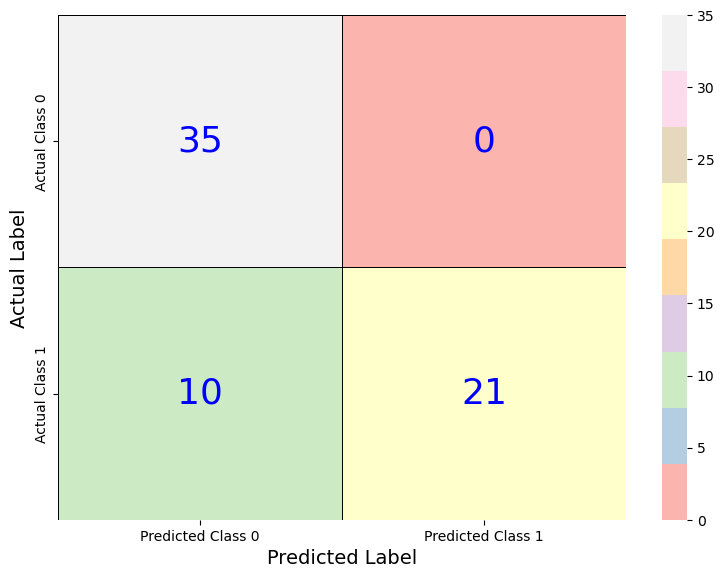

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

# Assuming X_FS_M is the data and Y_M are the labels for 66 subjects, each with 4 samples per subject
subjects = 66  # Number of subjects
samples_per_subject = 4  # Number of samples per subject

# Initialize lists to store true and predicted labels for each subject
Y_true_subjects = []
Y_pred_subjects = []

# Loop over each subject (LOSO Cross-Validation)
for i in range(subjects):
    # Get the indices for the test subject (the ith subject)
    test_indices = list(range(i * samples_per_subject, (i + 1) * samples_per_subject))
    
    # Get the training indices (all other subjects except the ith subject)
    train_indices = list(set(range(subjects * samples_per_subject)) - set(test_indices))
    
    # Split the data into training and testing sets
    X_train, X_test = X_FS_M[train_indices], X_FS_M[test_indices]
    Y_train, Y_test = Y_M[train_indices], Y_M[test_indices]
    
    # Train the model on the training set
    model = MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)
    model.fit(X_train, Y_train)
    
    # Predict the labels for the test set (left-out subject)
    Y_test_pred = model.predict(X_test)
    
    # Aggregate the test labels for the subject-level prediction
    true_label = np.bincount(Y_test).argmax()  # Majority class for subject (true labels)
    correct_classifications = np.sum(Y_test == Y_test_pred)  # Count correct predictions
    
    # Apply different rules based on the true class
    if true_label == 0:
        # For class 0: Correct if half or more of the samples are correctly classified
        if correct_classifications >= samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    else:
        # For class 1: Correct if more than half of the samples are correctly classified
        if correct_classifications > samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    
    # Store the true and predicted labels for this subject
    Y_true_subjects.append(true_label)
    Y_pred_subjects.append(predicted_label)

# Step 2: Generate the confusion matrix for subjects based on the aggregated predictions
cm = confusion_matrix(Y_true_subjects, Y_pred_subjects)

# Step 3: Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))

# Customize the colormap: You can choose any of the following
# cmap = 'Blues', 'Greens', 'Reds', 'coolwarm', 'inferno', 'plasma', 'magma', 'viridis', 'cividis'
sns.heatmap(cm, annot=True, fmt='g', cmap='Pastel1', cbar=True, 
            xticklabels=['Predicted Class 0', 'Predicted Class 1'], 
            yticklabels=['Actual Class 0', 'Actual Class 1'], 
            linewidths=0.5, linecolor='black', annot_kws={"size": 26, "color": "blue"})

# Customize labels and title
#plt.title('Confusion Matrix (LOSO CV: Main Dataset Meanders)', fontsize=16)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Show the plot
plt.tight_layout(pad=1.5)  # Adjusts the plot to ensure everything fits without overlap
# Save the figure as .eps file with proper bounding box
plt.savefig('cm_maindata_manders.eps', format='eps', dpi=300, bbox_inches='tight')  # Save with tight bounding box

# Save the figure as .jpg file
plt.savefig('cm_maindata_manders.jpg', format='jpg', dpi=300, bbox_inches='tight')  # Save as JPG
# Show the plot (optional, since we're saving the file)
plt.show()


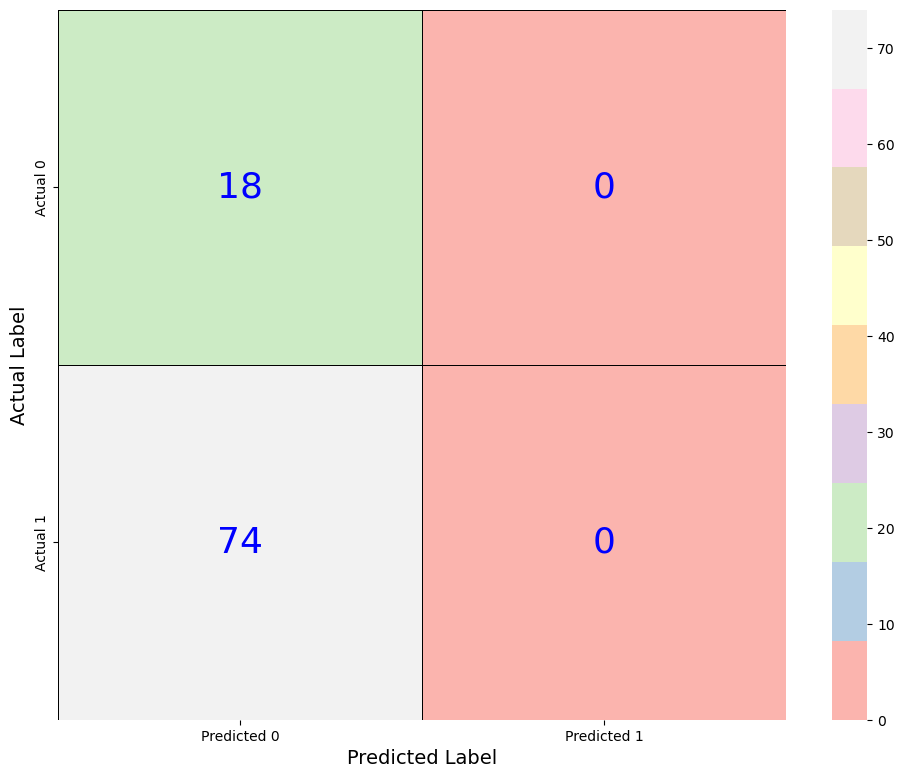

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

# Train the model
model = MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2, ), random_state=42)
model.fit(X_FS_M, Y_M)

# Make predictions on the test set for all samples
Y_df_M_hout_pred_samples = model.predict(X_FS_M_hout)

# Assuming `Y_df_M_hout` and `Y_df_M_hout_pred_samples` contain the true and predicted labels for each sample, 
# and that each subject has 4 samples.
subjects = len(Y_df_M_hout) // 4  # Assuming each subject has 4 samples
samples_per_subject = 4

# Step 1: Aggregate predictions for each subject
Y_true_subjects = []  # Ground truth for each subject
Y_pred_subjects = []  # Aggregated prediction for each subject

for i in range(subjects):
    # Get the true labels and predicted labels for the current subject's samples
    true_labels = Y_df_M_hout[i * samples_per_subject:(i + 1) * samples_per_subject]
    pred_labels = Y_df_M_hout_pred_samples[i * samples_per_subject:(i + 1) * samples_per_subject]
    
    # Get the majority true label for the subject
    true_label = np.bincount(true_labels).argmax()  # Majority class for subject (true labels)
    Y_true_subjects.append(true_label)
    
    # Count the number of correct predictions for this subject
    correct_classifications = np.sum(true_labels == pred_labels)
    
    # Apply different rules based on the true class
    if true_label == 0:
        # For class 0: Correct if half or more of the samples are correctly classified
        if correct_classifications >= samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    else:
        # For class 1: Correct if more than half of the samples are correctly classified
        if correct_classifications > samples_per_subject // 2:
            predicted_label = true_label  # Subject is correctly classified
        else:
            predicted_label = 1 - true_label  # Subject is incorrectly classified (flip the label)
    
    Y_pred_subjects.append(predicted_label)

# Step 2: Generate the confusion matrix for subjects
cm = confusion_matrix(Y_true_subjects, Y_pred_subjects)

# Step 3: Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))

# Customize the colormap: You can choose any of the following
# cmap = 'Blues', 'Greens', 'Reds', 'coolwarm', 'inferno', 'plasma', 'magma', 'viridis', 'cividis'
sns.heatmap(cm, annot=True, fmt='g', cmap='Pastel1', cbar=True, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], 
            linewidths=0.5, linecolor='black', annot_kws={"size": 26, "color": "blue"})  

# Customize labels and title
#plt.title('Confusion Matrix for New Dataset Meanders', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Show the plot
plt.tight_layout(pad=1.5)  # Adjusts the plot to ensure everything fits without overlap
# Save the figure as .eps file with proper bounding box
plt.savefig('cm_houtdata_manders.eps', format='eps', dpi=300, bbox_inches='tight')  # Save with tight bounding box

# Save the figure as .jpg file
plt.savefig('cm_houtdata_manders.jpg', format='jpg', dpi=300, bbox_inches='tight')  # Save as JPG
# Show the plot (optional, since we're saving the file)
plt.show()